In [1]:
import pandas as pd
train_TA = pd.read_csv("C:\\Users\\hp\\Downloads\\archive(7)\\train.csv")
train_TA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Count the missing values
print(train_TA.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Cleaning the data(fill'Age' with median, 'Embarked' with mode and remove 'Cabin') 
train_TA['Age'] = train_TA['Age'].fillna(train_TA['Age'].median())
train_TA['Embarked']= train_TA['Age'].fillna(train_TA['Age'].mode()[0])
train_TA.drop(columns = ['Cabin'], inplace = True,errors = 'ignore')

In [4]:
train_TA.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
# Feature creation(create 'Familysize' and extract 'Title' from 'Name')
train_TA['Familysize'] = train_TA['SibSp'] + train_TA['Parch'] + 1
train_TA['Title'] = train_TA['Name'].str.extract(r'(\b[A-Za-z]+\.)', expand=False)

In [6]:
# Encoding categorical Data(converting non-numerical into numbers)
train_TA['Sex'] = train_TA['Sex'].map({'male':0, 'female':1})
train_TA['Embarked']= train_TA['Embarked'].map({'C':0, 'Q':0, 'S':1})

In [7]:
# To convert 'Title' column to string format to ensure consistency and prevent error
train_TA['Title']= train_TA['Title'].astype(str)
print(train_TA['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


In [8]:
# Convert categorical text into numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_TA['Title'] = label_encoder.fit_transform(train_TA['Title'])

In [9]:
# To verify the conversion, remove extra spaces and convert to lawercase
train_TA['Title'] = train_TA['Title'].astype(str).str.strip().str.lower()
print(train_TA[['Title']].head())

  Title
0    12
1    13
2     9
3    13
4    12


In [10]:
train_TA.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
Familysize       0
Title            0
dtype: int64

In [11]:
# Drop irrelevant columns
drop_col = ['PassengerId', 'Name', 'Ticket']
train_TA = train_TA.drop(drop_col, axis=1, errors='ignore')

In [12]:
# split data into training and validation
from sklearn.model_selection import train_test_split
X = train_TA.drop(columns = ['Survived']) # input values
Y = train_TA['Survived']  # Labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Trian model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 100, random_state= 42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print(classification_report(Y_val, Y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [15]:
# Tuning hyperparmeters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={
    'n_estimators' : [50, 100, 200],
    'max_depth': [None, 5, 10],
}
grid_search= GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [16]:
import pandas as pd
test_TA = pd.read_csv("C:\\Users\\hp\\Downloads\\archive(7)\\test.csv")
test_TA.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# count the missing values
print(test_TA.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
# cleaning the missing values
test_TA['Age'] = test_TA['Age'].fillna(test_TA['Age'].median())
test_TA['Fare'] = test_TA['Fare'].fillna(test_TA['Fare'].mode()[0])
test_TA = test_TA.drop(columns =['Cabin'])

In [19]:
# Feature creation
test_TA['Familysize'] = test_TA['SibSp'] + test_TA['Parch'] + 1
test_TA['Title'] = test_TA['Name'].str.extract(r'(\b[A-Za-z]+\.)',expand=False)

In [20]:
columns = test_TA.columns
print(columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Familysize', 'Title'],
      dtype='object')


In [21]:
# Convert 'Sex' and 'Embarked' into numbers
test_TA['Sex']= test_TA['Sex'].map({'male':0, 'female':1})
test_TA['Embarked'] = test_TA['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [22]:
# To convert 'Title' into string type
test_TA['Title'] = test_TA['Title'].astype(str)
print(test_TA['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Ms.' 'Col.' 'Rev.' 'Dr.' 'Dona.']


In [23]:
# convert categorical into text into numbers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_TA['Title'] = label_encoder.fit_transform(test_TA['Title'])

In [24]:
# To verify if the conversion is succes
print(test_TA['Title'].head())

0    5
1    6
2    5
3    5
4    6
Name: Title, dtype: int32


In [25]:
# Drop irrelevant columns
drop_col = ['PassengerId', 'Name', 'Ticket']
test_TA= test_TA.drop(drop_col, axis=1)

In [26]:
# ensure consistent input features
for col in X_test.columns:
    if col not in X_train.columns:
        X_train[col] = 0 # or use np.nan

In [27]:
# ensure X_train contains the same columns as X_test
X_train = X_train[X_test.columns]

In [28]:
print(X.shape, Y.shape)

(891, 9) (891,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_test= test_TA.drop(columns = ['Survived'],errors ='ignore') 
Y_test= test_TA
# fit model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X_test)

In [31]:
print(X_train.shape, X_test.shape)
print(X_train.columns, X_test.columns)

(569, 9) (418, 9)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Familysize', 'Title'],
      dtype='object') Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Familysize', 'Title'],
      dtype='object')


In [32]:
# To clean and transform test_TA so it is ready to be used for machine learning model training 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def preprocess(test_Ti):
    # fill missing values
    test_Ti['Age'] = test_Ti['Age'].fillna(test_Ti['Age'].median())
    test_Ti['Embarked'].fillna(test_Ti['Embarked'].mode()[0])
    # Encode categorical variables
    test_Ti['Sex'] = test_Ti['Sex'].map({'male':0, 'female':1})
    test_Ti['Embarked'] = test_Ti['Embarked'].map({'C': 0, 'Q': 1, 'S':2})
    # Create new features 
    test_Ti['Familysize']= test_Ti['SibSp'] + test_Ti['Parch'] + 1
    # Define processed_Ti as modified test_Ti
    processed_Ti = test_Ti
    
    return processed_Ti

In [33]:
# convert continous labels to binary
print(Y_test[:5])
Y_test = (Y_test>= 0.5).astype(int)

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Familysize  Title
0       3    0  34.5      0      0   7.8292         1           1      5
1       3    1  47.0      1      0   7.0000         2           2      6
2       2    0  62.0      0      0   9.6875         1           1      5
3       3    0  27.0      0      0   8.6625         2           1      5
4       3    1  22.0      1      1  12.2875         2           3      6


In [34]:
# Find the best combination of hyperparameters for RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define model
model = RandomForestClassifier(random_state=42)
# specify hyperparmeter values
parama_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Set up GridsearchCV
grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=5)
# Train using the GridSearch
grid.fit(X_test, Y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [35]:
# extract the best-performing mode
best_model = grid.best_estimator_
print(best_model)

RandomForestClassifier(n_estimators=50, random_state=42)


In [36]:
# retrieve the best combination of hyperparameters
best_params = grid.best_params_
print(best_params)

{'max_depth': None, 'n_estimators': 50}


In [37]:
# the best average cross_validation score
best_score = grid.best_score_
print(best_score)

0.9856282271944922


In [38]:
# generate prediction
predictions = grid.best_estimator_.predict(X_test)
print(predictions)

[[1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 ...
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 0 1 1]]


In [39]:
# Checking if predictions and X_test
print(len(predictions))
print(X_test.shape[0])
print(Y_test.shape[0])

418
418
418


In [40]:
# Evaluate model accuracy
from sklearn.metrics import accuracy_score
# compare predictions with true labels(Y_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [85]:
# Evaluate with additonal metrics
from sklearn.metrics import classification_report, confusion_matrix
# Detailed classification metrics
print(classification_report(Y_test, predictions))
# confusion matrix
print(confusion_matrix, predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       135
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       316
           7       1.00      1.00      1.00       418
           8       1.00      1.00      1.00       416

   micro avg       1.00      1.00      1.00      2781
   macro avg       1.00      1.00      1.00      2781
weighted avg       1.00      1.00      1.00      2781
 samples avg       1.00      1.00      1.00      2781

<function confusion_matrix at 0x000001B768C68A40> [[1 0 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 ...
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 0 1 ... 0 1 1]]


In [113]:
import numpy as np
Y_test = np.array(Y_test).ravel()
predictions = np.array(predictions).ravel()

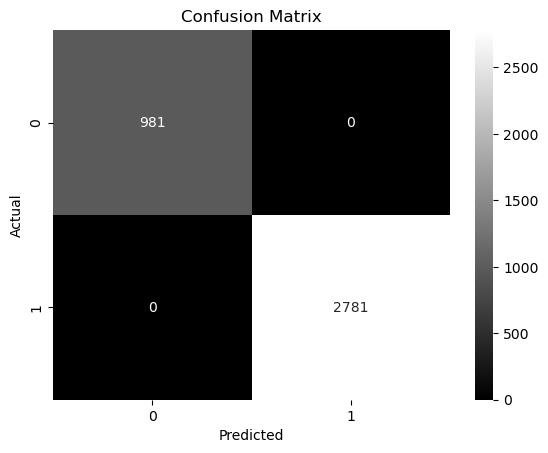

In [123]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt='d', cmap='grey')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [127]:
# Save the confusion matrix figure
plt.savefig('Confusion_matrix.png')


<Figure size 640x480 with 0 Axes>